In [1]:
import torch

In [ ]:
# Initializing a tensor

x = torch.tensor([[1,2]])
y = torch.tensor([[1],[2]])

In [ ]:
print(x.shape)
print(y.shape)

torch.Size([1, 2])
torch.Size([2, 1])


In [ ]:
print(x.dtype)

torch.int64


In [ ]:
x = torch.tensor([False, 1, 2.0])
print(x)

tensor([0., 1., 2.])


In [ ]:
torch.zeros((3, 4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
torch.ones((3, 4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
torch.randint(low=0, high=10, size=(3,4))

tensor([[7, 2, 8, 4],
        [8, 7, 9, 8],
        [9, 4, 8, 7]])

In [ ]:
torch.rand(3, 4)

tensor([[0.4300, 0.6937, 0.9556, 0.0172],
        [0.7962, 0.1419, 0.2748, 0.8776],
        [0.1149, 0.0694, 0.0843, 0.6589]])

In [ ]:
# Return a sample (or samples) from the “standard normal” distribution.

torch.randn((3,4))

tensor([[ 0.3629,  0.7268,  0.0701, -0.7092],
        [ 0.1998, -0.3023,  1.1879,  0.6534],
        [-2.5145,  0.6704, -0.0140,  1.3617]])

In [ ]:
import numpy as np

x = np.array([[10,20,30],[2,3,4]])
y = torch.tensor(x)
print(type(x), type(y))

<class 'numpy.ndarray'> <class 'torch.Tensor'>


## operations on tensors

In [ ]:
import torch
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
print(x * 10)

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])


In [ ]:
x = torch.tensor([[1,2,3,4], [5,6,7,8]])
y = x.add(10)
print(y)

tensor([[11, 12, 13, 14],
        [15, 16, 17, 18]])


In [ ]:
y = torch.tensor([2, 3, 1, 0])

y

tensor([2, 3, 1, 0])

In [ ]:
y = y.view(4,1)

y

tensor([[2],
        [3],
        [1],
        [0]])

In [ ]:
# another way for reshaping

x = torch.randn(10,1,10)
z1 = torch.squeeze(x, 1) # similar to np.squeeze()

# The same operation can be directly performed on
# x by calling squeeze and the dimension to squeeze out
z2 = x.squeeze(1)
assert torch.all(z1 == z2)
# all the elements in both tensors are equal
print('Squeeze:\n', x.shape, z1.shape)

Squeeze:
 torch.Size([10, 1, 10]) torch.Size([10, 10])


In [ ]:
# The opposite of squeeze is unsqueeze, which means we add a dimension
# to the matrix

x = torch.randn(10,10)
print(x.shape)
z1 = x.unsqueeze(0)
print(z1.shape)

torch.Size([10, 10])
torch.Size([1, 10, 10])


In [2]:
# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim
# at the specified axis
x = torch.randn(10,10)
z2, z3, z4 = x[None], x[:,None], x[:,:,None]
print(z2.shape, z3.shape, z4.shape)

torch.Size([1, 10, 10]) torch.Size([10, 1, 10]) torch.Size([10, 10, 1])


In [4]:
# Matrix multiplication of two different tensors

x = torch.tensor([[1,2,3,4], [5,6,7,8]])
y = torch.tensor([2, 3, 1, 0])
print(torch.matmul(x, y))

tensor([11, 35])


In [5]:
# matrix multiplication can also be performed by using the @ operator

print(x @ y)

tensor([11, 35])


In [6]:
# we can perform concatenation oftensors using the cat method

x = torch.randn(10,10,10)
z = torch.cat([x,x], axis=0) # np.concatenate()
print('Cat axis 0:', x.shape, z.shape)

Cat axis 0: torch.Size([10, 10, 10]) torch.Size([20, 10, 10])


In [10]:
# Extraction of the maximum value in a tensor

x = torch.arange(25).reshape(5,5)
print('Max:', x.shape, x.max())

Max: torch.Size([5, 5]) tensor(24)


In [14]:
# extract the maximum value along with the row index

x.max(dim=0)

torch.return_types.max(
values=tensor([20, 21, 22, 23, 24]),
indices=tensor([4, 4, 4, 4, 4]))

In [15]:
# maximum value across columns

m, argm = x.max(dim=1)
print('Max in axis 1:\n', m, argm)

Max in axis 1:
 tensor([ 4,  9, 14, 19, 24]) tensor([4, 4, 4, 4, 4])


In [16]:
x = torch.randn(10,20,30)
z = x.permute(2,0,1) # np.permute()
print('Permute dimensions:', x.shape, z.shape)

Permute dimensions: torch.Size([10, 20, 30]) torch.Size([30, 10, 20])


## Auto gradients of tensor objects

In [18]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
print(x)

# requires_grad parameter specifies that the
# gradient is to be calculated for the tensor object

tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


In [20]:
# define the way to calculate the output, which in this specific case is
# the sum of the squares of all inputs

out = x.pow(2).sum()
out

tensor(7., grad_fn=<SumBackward0>)

In [21]:
# The gradient of a value can be calculated by
# calling the backward() method to the value.

out.backward()

In [22]:
# obtain the gradient of out with respect to x

x.grad

tensor([[ 4., -2.],
        [ 2.,  2.]])

## Advantages of PyTorch's tensors over NumPy's ndarrays

In [ ]:
x = torch.rand(1, 6400)
y = torch.rand(6400, 5000)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# storing information in a device
x, y = x.to(device), y.to(device)


%timeit z=(x@y)
# It takes 0.515 milli seconds on an average to
# perform matrix multiplication

x, y = x.cpu(), y.cpu()
%timeit z=(x@y)
# It takes 9 milli seconds on an average to
# perform matrix multiplication


import numpy as np
x = np.random.random((1, 6400))
y = np.random.random((6400, 5000))
%timeit z = np.matmul(x,y)
# It takes 19 milli seconds on an average to
# perform matrix multiplication

## Building a neural network

In [24]:
# Define the input (x) and output (y) values

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [25]:
# Convert the input lists into tensor objects

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

# register the input (X) and output (Y) data points to the device – cuda
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [26]:
# building nn

import torch.nn as nn

class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)

  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

In [27]:
mynet = MyNeuralNet().to(device)

In [32]:
# for illustration only

class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Parameter(torch.rand(2,8))
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Parameter(torch.rand(8,1))

  def forward(self, x):
    x = x @ self.input_to_hidden_layer
    x = self.hidden_layer_activation(x)
    x = x @ self.hidden_to_output_layer
    return x

In [33]:
loss_func = nn.MSELoss()

In [34]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(76.4070, grad_fn=<MseLossBackward0>)


In [35]:
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [36]:
opt.zero_grad() # flush the previous epoch's gradients
loss_value = loss_func(mynet(X),Y) # compute loss
loss_value.backward() # perform back-propagation
opt.step() # update the weights according to the gradients computed

In [37]:
loss_history = []
for _ in range(50):
  opt.zero_grad()
  loss_value = loss_func(mynet(X),Y)
  loss_value.backward()
  opt.step()
  loss_history.append(loss_value)

loss_hist = []
for loss in loss_history:
  loss_hist.append(loss.detach().numpy())

Text(0, 0.5, 'loss value')

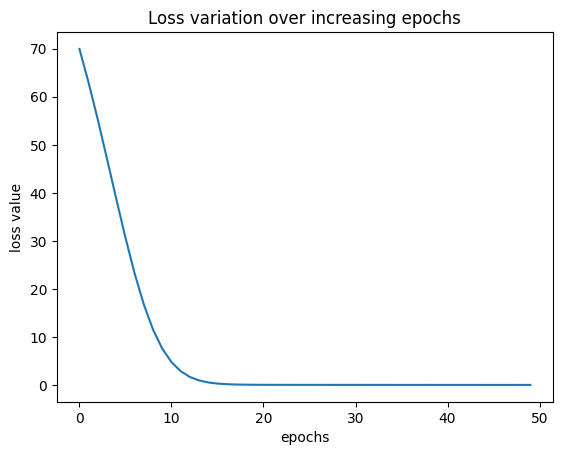

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_hist)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')

## Dataset, DataLoader, and batch size

In [46]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

# import the data, convert the data into floating-point numbers, and register them to a device

x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [47]:
class MyDataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x).float()
    self.y = torch.tensor(y).float()

  def __len__(self):
    return len(self.x)

  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]

In [ ]:
ds = MyDataset(X, Y)

In [49]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [50]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)
  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

In [51]:
mynet = MyNeuralNet().to(device)
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(mynet.parameters(), lr = 0.001)

In [52]:
import time
loss_history = []
start = time.time()
for _ in range(50):
  for data in dl:
    x, y = data
    opt.zero_grad()
    loss_value = loss_func(mynet(x),y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)
end = time.time()
print(end - start)

0.05288863182067871


## Predicting on new data points

In [53]:
val_x = [[10,11]]
val_x = torch.tensor(val_x).float().to(device)
mynet(val_x)

tensor([[20.1521]], grad_fn=<AddmmBackward0>)

## Implementing a custom loss function

In [54]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

X = torch.tensor(x).float()
Y = torch.tensor(y).float()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [ ]:
class MyDataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x).float()
    self.y = torch.tensor(y).float()
  def __len__(self):
    return len(self.x)
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]

ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)
  def forward(self, x):
    x = self.input_to_hidden_layer(x)
    x = self.hidden_layer_activation(x)
    x = self.hidden_to_output_layer(x)
    return x

mynet = MyNeuralNet().to(device)

In [56]:
def my_mean_squared_error(_y, y):
  loss = (_y-y)**2
  loss = loss.mean()
  return loss

In [57]:
loss_func = nn.MSELoss()
loss_value = loss_func(mynet(X),Y)
print(loss_value)

tensor(149.9762, grad_fn=<MseLossBackward0>)


In [58]:
my_mean_squared_error(mynet(X),Y)

tensor(149.9762, grad_fn=<MeanBackward0>)

## Fetching the values of intermediate layers

In [59]:
input_to_hidden = mynet.input_to_hidden_layer(X)
hidden_activation = mynet.hidden_layer_activation(input_to_hidden)
print(hidden_activation)

tensor([[0.5402, 0.2754, 0.0000, 0.0000, 0.0000, 2.1612, 0.0000, 0.0000],
        [1.1385, 1.1568, 0.0209, 0.0000, 0.0000, 4.3106, 0.0000, 0.0000],
        [1.7367, 2.0381, 0.2231, 0.0000, 0.0000, 6.4599, 0.0000, 0.0000],
        [2.3350, 2.9195, 0.4253, 0.0000, 0.0000, 8.6093, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)


In [60]:
class neuralnet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer = nn.Linear(2,8)
    self.hidden_layer_activation = nn.ReLU()
    self.hidden_to_output_layer = nn.Linear(8,1)
  def forward(self, x):
    hidden1 = self.input_to_hidden_layer(x)
    hidden2 = self.hidden_layer_activation(hidden1)
    output = self.hidden_to_output_layer(hidden2)
    return output, hidden2

In [61]:
mynet = neuralnet().to(device)
mynet(X)[1]

tensor([[0.0000, 0.5750, 0.1594, 0.2879, 0.0000, 0.3105, 0.0000, 0.0149],
        [0.0000, 1.4330, 0.3003, 0.1229, 0.8910, 0.2755, 0.0000, 0.2780],
        [0.0000, 2.2909, 0.4412, 0.0000, 1.8152, 0.2405, 0.0000, 0.5411],
        [0.0000, 3.1488, 0.5820, 0.0000, 2.7395, 0.2056, 0.0000, 0.8042]],
       grad_fn=<ReluBackward0>)

## Using a sequential method to build a neural network

In [62]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [63]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [64]:
class MyDataset(Dataset):
  def __init__(self, x, y):
    self.x = torch.tensor(x).float().to(device)
    self.y = torch.tensor(y).float().to(device)
  def __getitem__(self, ix):
    return self.x[ix], self.y[ix]
  def __len__(self):
    return len(self.x)

In [65]:
ds = MyDataset(x, y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [66]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
).to(device)

In [ ]:
# Print a summary of the model

!pip install torch_summary

In [68]:
from torchsummary import summary

summary(model, torch.zeros(1,2))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [69]:
loss_func = nn.MSELoss()
from torch.optim import SGD
opt = SGD(model.parameters(), lr = 0.001)
import time
loss_history = []
start = time.time()
for _ in range(50):
  for ix, iy in dl:
    opt.zero_grad()
    loss_value = loss_func(model(ix),iy)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value)
end = time.time()
print(end - start)

0.054453372955322266


In [70]:
val = [[8,9],[10,11],[1.5,2.5]]

In [71]:
model(torch.tensor(val).float().to(device))

tensor([[16.7245],
        [20.5408],
        [ 4.3216]], grad_fn=<AddmmBackward0>)

## Saving and loading a PyTorch model

The model.state_dict() command is at the root of understanding how saving and
loading PyTorch models works. The dictionary in model.state_dict()
corresponds to the parameter names (keys) and the values (weight and bias values)
corresponding to the model.

In [72]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1752, -0.3821],
                      [ 0.2972,  1.1760],
                      [ 0.2538, -0.5892],
                      [ 0.2779, -0.3417],
                      [-0.4919,  0.0077],
                      [-0.6258, -0.2192],
                      [-0.5091, -0.3709],
                      [-0.0051,  0.6541]])),
             ('0.bias',
              tensor([ 0.5155, -0.0125, -0.1358, -0.4329,  0.4616, -0.3602,  0.2535, -0.1495])),
             ('2.weight',
              tensor([[ 0.3001,  1.1058, -0.0777,  0.1883, -0.2953, -0.1595,  0.0470,  0.4301]])),
             ('2.bias', tensor([-0.0442]))])

In [73]:
torch.save(model.to('cpu').state_dict(), 'mymodel.pth')

## Loading

In [74]:
model = nn.Sequential(
  nn.Linear(2, 8),
  nn.ReLU(),
  nn.Linear(8, 1)
).to(device)

In [75]:
state_dict = torch.load('mymodel.pth')

In [76]:
model.load_state_dict(state_dict)
# <All keys matched successfully>
model.to(device)
model(torch.tensor(val).float().to(device))

tensor([[16.7245],
        [20.5408],
        [ 4.3216]], grad_fn=<AddmmBackward0>)